# Spark Session
Точка входа в PySpark - это `SparkSession`. Это некоторый способ инициализации базовой функциональности PySpark (Dataset, Dataframe, ...).  
Внутри `SparkSession` создаются `SparkConfig` и `SparkContext` с некоторой конфигурацией, передаваемой в качестве параметра.
Для создания `SparkSession` используется метод `builder()`, а также ряд дополнительных методов:
 - `getOrCreate()` - создать или вернуть существующую Spark-сессию
 - `appName()` - имя приложения
 - `master("local[x]")` - передача имени кластера (yarn, mesos, local[x], где x - целое число, большее 0, указывающее на количество разделов, создаваемых при использовании Dataframe, Dataset, RDD; x можно установить равному количеству ядер ЦП).

In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master('local[4]')\
                    .appName('stepik').getOrCreate()
spark

# Чтение/просмотр данных
* Можно читать данные самых разных форматов с помощью функции `read`.
* Для отображения набора используется `show()`

In [7]:
iris_data = spark.read.json('data/iris.json')
iris_data

DataFrame[_corrupt_record: string, petalLength: double, petalWidth: double, sepalLength: double, sepalWidth: double, species: string]

In [11]:
iris_data.show()

+---------------+-----------+----------+-----------+----------+-------+
|_corrupt_record|petalLength|petalWidth|sepalLength|sepalWidth|species|
+---------------+-----------+----------+-----------+----------+-------+
|              [|       null|      null|       null|      null|   null|
|           null|        1.4|       0.2|        5.1|       3.5| setosa|
|           null|        1.4|       0.2|        4.9|       3.0| setosa|
|           null|        1.3|       0.2|        4.7|       3.2| setosa|
|           null|        1.5|       0.2|        4.6|       3.1| setosa|
|           null|        1.4|       0.2|        5.0|       3.6| setosa|
|           null|        1.7|       0.4|        5.4|       3.9| setosa|
|           null|        1.4|       0.3|        4.6|       3.4| setosa|
|           null|        1.5|       0.2|        5.0|       3.4| setosa|
|           null|        1.4|       0.2|        4.4|       2.9| setosa|
|           null|        1.5|       0.1|        4.9|       3.1| 

* С помощью функции `printSchema()` можно отобразить структуру набора данных

In [2]:
stock_data = spark.read.csv('data/stocks_price_final.csv',
                            sep=',',
                            header=True)
stock_data.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- symbol: string (nullable = true)
 |-- date: string (nullable = true)
 |-- open: string (nullable = true)
 |-- high: string (nullable = true)
 |-- low: string (nullable = true)
 |-- close: string (nullable = true)
 |-- volume: string (nullable = true)
 |-- adjusted: string (nullable = true)
 |-- market.cap: string (nullable = true)
 |-- sector: string (nullable = true)
 |-- industry: string (nullable = true)
 |-- exchange: string (nullable = true)



In [15]:
stock_data.show(n=3)

+---+------+----------+---------+------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|_c0|symbol|      date|     open|  high|      low|    close| volume| adjusted|market.cap|       sector|            industry|exchange|
+---+------+----------+---------+------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|  1|   TXG|2019-09-12|       54|    58|       51|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  2|   TXG|2019-09-13|    52.75|54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  3|   TXG|2019-09-16|52.450001|    56|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
+---+------+----------+---------+------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
only showing top 3 rows



* Можно задать структуру набора данных данных самому (имя, тип, допускается ли наличие Null и метаданные)

In [3]:
from pyspark.sql.types import *
# StructField, StructType, ItegerType()

#StructField?
custom_fields = [
    StructField(name='_c0', dataType=IntegerType(), nullable=True),
    StructField(name='symbol', dataType=StringType(), nullable=True),
    StructField(name='data', dataType=DateType(), nullable=True),
    StructField(name='open', dataType=DoubleType(), nullable=True),
    StructField(name='high', dataType=DoubleType(), nullable=True),
    StructField(name='low', dataType=DoubleType(), nullable=True),
    StructField(name='close', dataType=DoubleType(), nullable=True),
    StructField(name='volume', dataType=IntegerType(), nullable=True),
    StructField(name='adjusted', dataType=DoubleType(), nullable=True),
    StructField(name='market.cap', dataType=StringType(), nullable=True),
    StructField(name='sector', dataType=StringType(), nullable=True),
    StructField(name='industry', dataType=StringType(), nullable=True),
    StructField(name='exchange', dataType=StringType(), nullable=True)
]

custom_schema = StructType(fields=custom_fields)
stock_data = spark.read.csv('data/stocks_price_final.csv',
                            sep=',',
                            header=True,
                            schema=custom_schema)
stock_data.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- symbol: string (nullable = true)
 |-- data: date (nullable = true)
 |-- open: double (nullable = true)
 |-- high: double (nullable = true)
 |-- low: double (nullable = true)
 |-- close: double (nullable = true)
 |-- volume: integer (nullable = true)
 |-- adjusted: double (nullable = true)
 |-- market.cap: string (nullable = true)
 |-- sector: string (nullable = true)
 |-- industry: string (nullable = true)
 |-- exchange: string (nullable = true)



# Методы инспекции данных

##### схема данных в виде StructType

In [27]:
stock_data.schema

StructType([StructField('_c0', IntegerType(), True), StructField('symbol', StringType(), True), StructField('data', DateType(), True), StructField('open', DoubleType(), True), StructField('high', DoubleType(), True), StructField('low', DoubleType(), True), StructField('close', DoubleType(), True), StructField('volume', IntegerType(), True), StructField('adjusted', DoubleType(), True), StructField('market.cap', StringType(), True), StructField('sector', StringType(), True), StructField('industry', StringType(), True), StructField('exchange', StringType(), True)])

##### список кортежей с именами столбцов и типами данных

In [28]:
stock_data.dtypes

[('_c0', 'int'),
 ('symbol', 'string'),
 ('data', 'date'),
 ('open', 'double'),
 ('high', 'double'),
 ('low', 'double'),
 ('close', 'double'),
 ('volume', 'int'),
 ('adjusted', 'double'),
 ('market.cap', 'string'),
 ('sector', 'string'),
 ('industry', 'string'),
 ('exchange', 'string')]

##### возвращение строк в виде спискА

In [29]:
stock_data.head(2) # 2 rows

[Row(_c0=1, symbol='TXG', data=datetime.date(2019, 9, 12), open=54.0, high=58.0, low=51.0, close=52.75, volume=7326300, adjusted=52.75, market.cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ'),
 Row(_c0=2, symbol='TXG', data=datetime.date(2019, 9, 13), open=52.75, high=54.355, low=49.150002, close=52.27, volume=1025200, adjusted=52.27, market.cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ')]

##### возвращение первой строки данных

In [30]:
stock_data.first()

Row(_c0=1, symbol='TXG', data=datetime.date(2019, 9, 12), open=54.0, high=58.0, low=51.0, close=52.75, volume=7326300, adjusted=52.75, market.cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ')

##### выбор определенных столбцов + вычисление некоторых статистических характеристик (для столбцов с числовым типом)

In [41]:
stock_data.select(['low', 'close']).describe().show()

+-------+------------------+------------------+
|summary|               low|             close|
+-------+------------------+------------------+
|  count|           1726301|           1726301|
|   mean|14557.808227578991|15032.714854330708|
| stddev| 1072968.155843425|1109755.9294000661|
|    min|             0.052|             0.071|
|    max|      1.55151728E8|      1.58376592E8|
+-------+------------------+------------------+



##### список названий столбцов

In [32]:
stock_data.columns

['_c0',
 'symbol',
 'data',
 'open',
 'high',
 'low',
 'close',
 'volume',
 'adjusted',
 'market.cap',
 'sector',
 'industry',
 'exchange']

##### число строк в наборе данных

In [33]:
stock_data.count()

1729034

##### количество различных строк в наборе данных

In [37]:
stock_data.distinct().count()

1729034

# Добавление, удаление и обновление столбцов

Для добавления используется `withColumn(имя, данные)`

In [44]:
stock_data = stock_data.withColumn('date', stock_data.data)
stock_data.select(['_c0', 'data', 'exchange', 'date']).show(1)

+---+----------+--------+----------+
|_c0|      data|exchange|      date|
+---+----------+--------+----------+
|  1|2019-09-12|  NASDAQ|2019-09-12|
+---+----------+--------+----------+
only showing top 1 row



Для переименования столбца используется `withColumnRenamed(столбец, его новое имя)`

In [52]:
stock_data = stock_data.withColumnRenamed('_c0', 'index')
stock_data.show(1)

+-----+------+----------+----+----+----+-----+-------+--------+----------+-------------+--------------------+--------+----------+
|index|symbol|      data|open|high| low|close| volume|adjusted|market.cap|       sector|            industry|exchange|      date|
+-----+------+----------+----+----+----+-----+-------+--------+----------+-------------+--------------------+--------+----------+
|    1|   TXG|2019-09-12|54.0|58.0|51.0|52.75|7326300|   52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|2019-09-12|
+-----+------+----------+----+----+----+-----+-------+--------+----------+-------------+--------------------+--------+----------+
only showing top 1 row



Удаление столбца с помощью `drop(имя столбца)`

In [53]:
stock_data = stock_data.drop('date')
stock_data.show(1)

+-----+------+----------+----+----+----+-----+-------+--------+----------+-------------+--------------------+--------+
|index|symbol|      data|open|high| low|close| volume|adjusted|market.cap|       sector|            industry|exchange|
+-----+------+----------+----+----+----+-----+-------+--------+----------+-------------+--------------------+--------+
|    1|   TXG|2019-09-12|54.0|58.0|51.0|52.75|7326300|   52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
+-----+------+----------+----+----+----+-----+-------+--------+----------+-------------+--------------------+--------+
only showing top 1 row



##### задание

In [59]:
# drop
stock_data_task = stock_data.drop('symbol', 'adjusted', 
                                   'market.cap', 'exchange', 'close')
# rename
stock_data_task = stock_data_task.withColumnRenamed('index', '_c0')

# create new column
stock_data_task = stock_data_task.withColumn('new_volume', stock_data_task.volume)
stock_data_task = stock_data_task.drop('volume')

# change data in both columns `high` and `low`
stock_data_task = stock_data_task.withColumnRenamed('high', 'low_temp')
stock_data_task = stock_data_task.withColumnRenamed('low', 'high')
stock_data_task = stock_data_task.withColumnRenamed('low_temp', 'low')

# move `data` to end
stock_data_task = stock_data_task.withColumn('new_data', stock_data_task.data)
stock_data_task = stock_data_task.drop('data')
stock_data_task = stock_data_task.withColumnRenamed('new_data', 'data')

# showing top 3 rows
stock_data_task.show(3)

+---+---------+------+---------+-------------+--------------------+----------+----------+
|_c0|     open|   low|     high|       sector|            industry|new_volume|      data|
+---+---------+------+---------+-------------+--------------------+----------+----------+
|  1|     54.0|  58.0|     51.0|Capital Goods|Biotechnology: La...|   7326300|2019-09-12|
|  2|    52.75|54.355|49.150002|Capital Goods|Biotechnology: La...|   1025200|2019-09-13|
|  3|52.450001|  56.0|52.009998|Capital Goods|Biotechnology: La...|    269900|2019-09-16|
+---+---------+------+---------+-------------+--------------------+----------+----------+
only showing top 3 rows



# Работа с пропущенными значениями

In [19]:
# удаление строк с пропущенными значениями
stock_data.select(['_c0', 'high']).na.drop().count()

1726301

In [23]:
# замена на медиану
from pyspark.ml.feature import Imputer
imp = Imputer(inputCol='high',
              outputCol='high_imputed').setStrategy('median')
imp.fit(stock_data).transform(stock_data).show(3)

+---+------+----------+---------+------+---------+---------+-------+---------+----------+-------------+--------------------+--------+------------+
|_c0|symbol|      data|     open|  high|      low|    close| volume| adjusted|market.cap|       sector|            industry|exchange|high_imputed|
+---+------+----------+---------+------+---------+---------+-------+---------+----------+-------------+--------------------+--------+------------+
|  1|   TXG|2019-09-12|     54.0|  58.0|     51.0|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|        58.0|
|  2|   TXG|2019-09-13|    52.75|54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|      54.355|
|  3|   TXG|2019-09-16|52.450001|  56.0|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|        56.0|
+---+------+----------+---------+------+---------+---------+-------+---------+----------+-------------+---------------

In [26]:
number_of_rows_without_NaN = stock_data.withColumnRenamed('market.cap', 'market')\
                             .na.drop().count()
number_of_rows = stock_data.count()

number_of_rows - number_of_rows_without_NaN

3827

# Получение данных (запросы)

##### выбор одного или нескольких столбцов

In [32]:
stock_data.select(['high', 'low', 'data']).show(3)

+------+---------+----------+
|  high|      low|      data|
+------+---------+----------+
|  58.0|     51.0|2019-09-12|
|54.355|49.150002|2019-09-13|
|  56.0|52.009998|2019-09-16|
+------+---------+----------+
only showing top 3 rows



##### фильтрование данных на основе условия (или нескольких условий)

In [38]:
from pyspark.sql.functions import col, lit
# col('column_name') возвращает столбец исходных данных
# lit('constant') возвращает столбец с константой, указанной в скобках

stock_data.filter( (col('low') >= lit('54')) & (col('data') < lit('2019-05-01'))).count()

73369

##### проверка на принадлежность диапазону

In [40]:
stock_data.filter(stock_data.adjusted.between(100, 500)).count()

142632

###### 1 или 0 в зависимости от условия

In [45]:
from pyspark.sql.functions import when

stock_data.select('close', 'open', when(stock_data.adjusted >= 300, 1).otherwise(0)).show()

+---------+---------+---------------------------------------------+
|    close|     open|CASE WHEN (adjusted >= 300) THEN 1 ELSE 0 END|
+---------+---------+---------------------------------------------+
|    52.75|     54.0|                                            0|
|    52.27|    52.75|                                            0|
|55.200001|52.450001|                                            0|
|56.779999|56.209999|                                            0|
|     62.0|56.849998|                                            0|
|61.119999|62.810001|                                            0|
|     60.5|61.709999|                                            0|
|60.330002|60.220001|                                            0|
|54.299999|     61.0|                                            0|
|52.759998|54.459999|                                            0|
|49.990002|52.779999|                                            0|
|51.029999|51.130001|                           

###### извлечение строк, подходящих под паттерн

In [49]:
stock_data.select('sector',
                  stock_data.sector.rlike('^[B,C]').alias('Колонка sector начинается с B или с C')
                 ).distinct().show()

+--------------------+-------------------------------------+
|              sector|Колонка sector начинается с B или с C|
+--------------------+-------------------------------------+
|         Health Care|                                false|
|       Capital Goods|                                 true|
|Consumer Non-Dura...|                                 true|
|    Public Utilities|                                false|
|   Consumer Durables|                                 true|
|             Finance|                                false|
|      Transportation|                                false|
|       Miscellaneous|                                false|
|   Consumer Services|                                 true|
|              Energy|                                false|
|    Basic Industries|                                 true|
|          Technology|                                false|
+--------------------+-------------------------------------+



###### группировка данных по столбцу + агрегирующие функции

In [51]:
import pyspark.sql.functions as f

stock_data.select(['industry', 'adjusted'])\
          .groupBy('industry').mean().show()

+--------------------+------------------+
|            industry|     avg(adjusted)|
+--------------------+------------------+
|Finance/Investors...| 4.991354066964286|
|       Miscellaneous|16.148959322959186|
|Investment Banker...| 58.15783725890326|
|   Food Distributors| 42.91047608357858|
|Miscellaneous man...|15.369818847193876|
|        Broadcasting| 24.69910202962527|
|Agricultural Chem...|21.635093418154764|
|Biotechnology: Bi...|24.745079978273193|
|Other Specialty S...| 84.55525036482346|
|Biotechnology: El...| 33.21022605613577|
|Other Consumer Se...| 43.43498980879015|
|Electric Utilitie...| 40.39245735242019|
|     Specialty Foods| 64.18661875197692|
|    Plastic Products|31.407765850921646|
|        Water Supply|40.173327914876424|
|               Banks| 21.02921007344001|
|Farming/Seeds/Mil...|27.022539238958867|
|Medical/Nursing S...| 70.77964412074782|
|Marine Transporta...|20.419158656223214|
|Biotechnology: La...|102.24022548951916|
+--------------------+------------

In [55]:
stock_data.filter(col('data') >= lit('2019-01-02'))\
          .groupBy('sector')\
          .agg(f.min('adjusted').alias('Min цена акций'),
               f.max('adjusted').alias('Max цена акций'),
               f.avg('adjusted').alias('Average цена акций')).show()

+--------------------+--------------+--------------+------------------+
|              sector|Min цена акций|Max цена акций|Average цена акций|
+--------------------+--------------+--------------+------------------+
|       Miscellaneous|        0.1361|   1035.829956| 51.80973033632307|
|         Health Care|         0.071|      187000.0|118.97394778016259|
|    Public Utilities|         0.325|     280.67395|34.730155685004625|
|              Energy|          0.09|    879.057007|23.684714263000867|
|Consumer Non-Dura...|          0.12|    664.130005| 42.81762456569038|
|             Finance|          0.27|   1341.079956|37.100285227180336|
|    Basic Industries|          0.23|  1.57249392E8|263865.51070311887|
|       Capital Goods|     -1.230099|    4037.77002| 59.97512253879277|
|          Technology|          0.13|        2736.0| 49.25234033754473|
|   Consumer Services|         0.134|      19843.75|54.361878278461404|
|   Consumer Durables|          0.31|      118750.0| 389.6417639

### Задание на получение данных

In [65]:
bank_data = spark.read.csv('data/bank.csv', sep=';', header=True, inferSchema=True)
bank_data.printSchema()

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- y: string (nullable = true)



In [66]:
bank_data.show(1)

+---+----------+-------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+---+
|age|       job|marital|education|default|balance|housing|loan| contact|day|month|duration|campaign|pdays|previous|poutcome|  y|
+---+----------+-------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+---+
| 30|unemployed|married|  primary|     no|   1787|     no|  no|cellular| 19|  oct|      79|       1|   -1|       0| unknown| no|
+---+----------+-------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+---+
only showing top 1 row



Построить распределение клиентов по возрасту

In [112]:
bank_data.groupBy('age').count().show(5)

+---+-----+
|age|count|
+---+-----+
| 31|  199|
| 65|    6|
| 53|   94|
| 78|    3|
| 34|  231|
+---+-----+
only showing top 5 rows



Распределение клиентов по возрасту + сортировка по убыванию количества

In [81]:
bank_data.groupBy('age').count().sort(f.desc('count')).show(5)

+---+-----+
|age|count|
+---+-----+
| 34|  231|
| 32|  224|
| 31|  199|
| 36|  188|
| 33|  186|
+---+-----+
only showing top 5 rows



Распределение клиентов по возрасту + сортировка по возрастанию возраста

In [83]:
bank_data.groupBy('age').count().sort(col('age')).show(5)

+---+-----+
|age|count|
+---+-----+
| 19|    4|
| 20|    3|
| 21|    7|
| 22|    9|
| 23|   20|
+---+-----+
only showing top 5 rows



Распределение клиентов, которым больше 30 лет, по возрасту + сортировка по возрастанию возраста

In [86]:
bank_data.filter(bank_data['age'] > 30).groupBy('age').count()\
         .sort(bank_data['age']).show(5)

+---+-----+
|age|count|
+---+-----+
| 31|  199|
| 32|  224|
| 33|  186|
| 34|  231|
| 35|  180|
+---+-----+
only showing top 5 rows



# Визуализация
Данные можно преобразовать в pandas DataFrame, затем использовать уже известные методы визуализации

In [114]:
import pandas as pd

sector = stock_data.select(['sector', 'adjusted']).groupBy('sector')\
                   .mean().toPandas()

,sector,avg(adjusted)
0,Miscellaneous,51.809730
1,Health Care,118.973948
2,Public Utilities,34.730156
3,Energy,23.684714
4,Consumer Non-Durables,42.817625
5,Finance,37.100285
6,Basic Industries,263865.510703
7,Capital Goods,59.975123
8,Technology,49.252340
9,Consumer Services,54.361878


<AxesSubplot:xlabel='sector'>

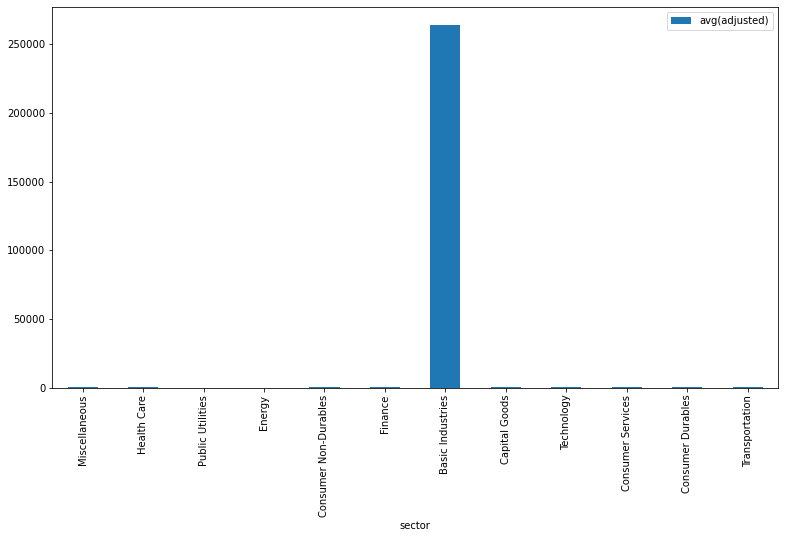

In [123]:
sector.plot.bar(x='sector', y='avg(adjusted)', figsize=(13, 7))